# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="ticks")

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [15]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

In [11]:
#reminder: not working this way why????? consult
pd.read_csv('Online_Retail.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 28: invalid start byte

### Step 3. Assign it to a variable called online_rt

In [16]:
online_rt = pd.read_csv(path, encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [17]:
countries = online_rt.groupby('Country').sum()

In [18]:
countries = countries.sort_values(by = 'Quantity', ascending = False)[1:11]

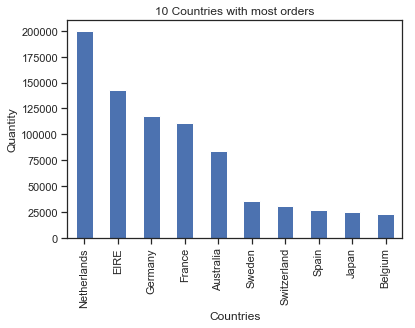

In [19]:
countries['Quantity'].plot(kind='bar')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()

### Step 5.  Exclude negative Quatity entries

In [20]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [21]:
customers = online_rt.groupby(['CustomerID','Country']).sum()

In [22]:
customers = customers[customers.UnitPrice > 0]

In [25]:
customers['Country'] = customers.index.get_level_values(1)

In [26]:
top_countries =  ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]

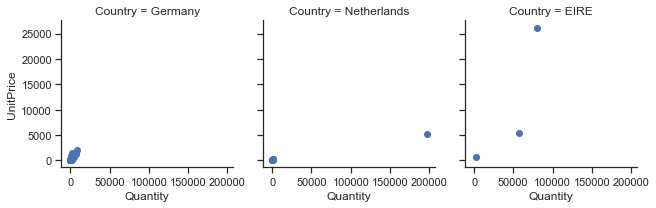

In [27]:
g = sns.FacetGrid(customers, col="Country")

g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

g.add_legend()